# Football in Python

This is a notebook with various bits of Python programming to support analysis of football strategy.

## A Football Field Class

This class creats a football field object.

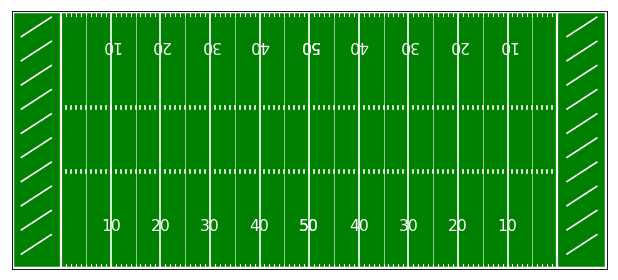

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

class FootballField():
    def __init__(self, fl = 100, fw = 53.333):
        self.fl = fl
        self.fw = fw

        self.fig, self.ax = plt.subplots(1,1, figsize=0.08*np.array([fl+20,fw]), dpi=80)
        self.ax.tick_params(axis='y', which='both', left='off', labelleft='off')
        self.ax.tick_params(axis='x', which='both', bottom='off', labelbottom='off')
        self.ax.set_xlim(-10, fl + 10)
        self.ax.set_ylim(0, fw)
        self.ax.set_facecolor('green')
        from matplotlib import get_backend
        self.backend = get_backend()

        # five yard lines
        for x in range(5, fl+1, 10):
            self.ax.plot([x,x],[0,fw],'w',lw=0.5)

        # ten yard lines
        for x in range(0, fl+1, 10):
            self.ax.plot([x,x], [0,fw], 'w', lw=1.5)

        # goal lines
        self.ax.plot([0,0], [0,fw], 'w', lw=2)
        self.ax.plot([fl,fl], [0,fw], 'w', lw=2)

        # hash marks
        for x in range(0, fl+1):
            self.ax.plot([x,x], [0,1], 'w', lw=1)
            self.ax.plot([x,x], [fw,fw-1], 'w', lw=1)
            self.ax.plot([x,x], [fw/2 + 19/3, fw/2 + 21/3], 'w')
            self.ax.plot([x,x], [fw/2 - 19/3, fw/2 - 21/3], 'w')

        # yard numbering
        for x in range(10, int(fl/2 + 1), 10):
            self.ax.text(x, 8, str(x), ha='center', color='white', size=14)
            self.ax.text(fl-x, 8, str(x), ha='center', color='white', size=14)
            self.ax.text(x, fw-8, str(x), ha='center', color='white', size=14, rotation=180)
            self.ax.text(fl-x, fw-8, str(x), ha='center', color='white', size=14, rotation=180)

        # end zone hashing
        for y in range(5,int(fw+1),5):
            self.ax.plot([-8,-2],[y-2,y+2],'w')
            self.ax.plot([fl+2,fl+8],[y-2,y+2],'w')

        # out of bounds lines
        self.ax.plot([-10,fl+10,fl+10,-10,-10],[0,0,fw,fw,0],'w',lw=4)
        
    def update(self):
        self.fig.canvas.draw()
        self.fig.show()
        if self.backend != 'nbAgg':
            display.clear_output(wait=True)
            display.display(self.fig)
        

field = FootballField(100)

## Player Class

Given a field, the player class creates a player object on the field. The player object contains methods to compute to move the player, compute distance and angle to another player.

In [10]:
%matplotlib inline
import numpy as np

class Player():
    def __init__(self, field, x, y, symbol='yo', speed=1):
        self.field = field
        self.symbol = symbol
        self.x = x
        self.y = y
        self.line, = self.field.ax.plot(self.x, self.y, self.symbol, ms=10)
        self.velocity = speed
        self.heading = 0
        
    def __repr__(self):
        return self.symbol
        
    def moveto(self, x, y):
        self.x = x
        self.y = y
        self.line.set_data(self.x, self.y)
        
    def move(self, dt):
        print(self, self.heading)
        self.x += dt*self.velocity*np.cos(self.heading*np.pi/180)
        self.y += dt*self.velocity*np.sin(self.heading*np.pi/180)
        self.line.set_data(self.x, self.y)
        
    def spin(self, da):
        self.heading += da
        
    def pos(self):
        return self.x, self.y
    
    def dist(self, p):
        return np.sqrt((self.x - p.x)**2 + (self.y - p.y)**2)
    
    def angle(self, p):
        return 180*np.arctan2(p.y-self.y, p.x-self.x)/np.pi
    
    def is_inbounds(self):
        return (self.x > 0) and (self.x < self.field.fl) and (self.y > 0) and (self.y < self.field.fw)
        

## Cornerback chasing Wide Receiver

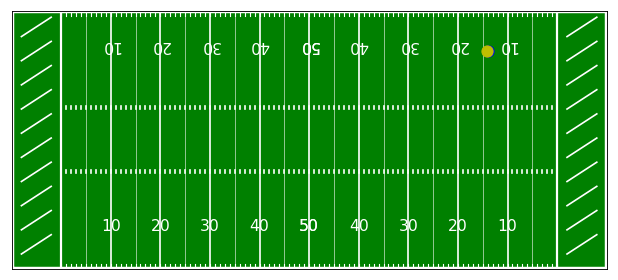

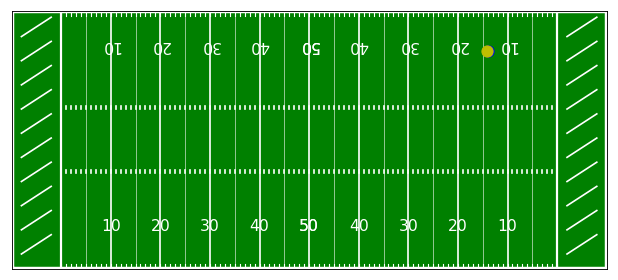

In [12]:
# create the field object
field = FootballField()

# create two players
WR =  Player(field, 10, 45, 'bo', speed=1.0)
LCB = Player(field, 10,  5, 'yo', speed=1.3)

# wide receiver heads downfield. cornerback runs directly towards wr
while WR.is_inbounds() and (LCB.dist(WR) > 0.1):
    LCB.heading = LCB.angle(WR)
    WR.move(1)
    LCB.move(1)
    field.update()


## Safety on Wide Receiver

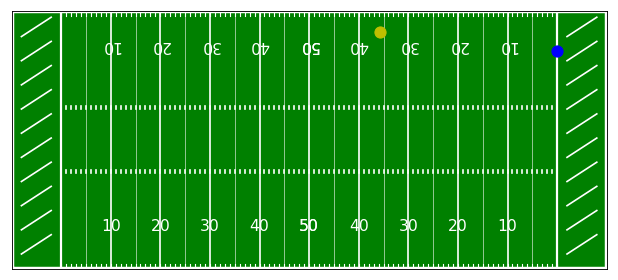

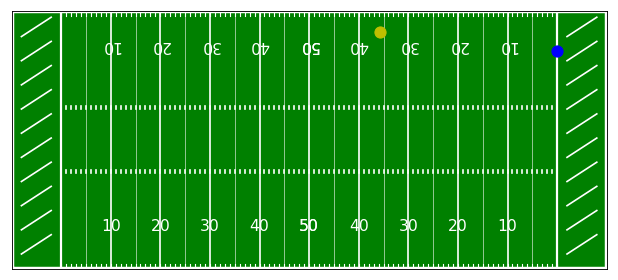

In [33]:
# create the field object
field = FootballField()

# create two players
WR = Player(field, 10, 45, 'bo', speed=1.0)
S  = Player(field, 10,  5, 'yo', speed=1.3)

# wide receiver heads downfield. 
# safety initial runs 
S.heading = 40
bearing_prev = S.angle(WR) + S.heading

while WR.is_inbounds() and (S.dist(WR) > 0.1):
    bearing = S.angle(WR) + S.heading
    print(bearing, S.heading, bearing-bearing_prev)
    da = max(-10, min(10, 0.5*(bearing-bearing_prev)**3))
    S.heading += da
    print(da, S.heading)
    WR.move(1)
    S.move(1)
    field.update()
    bearing_prev = bearing